In [31]:
import pandas as pd
sidemen_statistics_path = 'SidemenReacts_video_statistics.csv'
sidemen_comments_path = 'SidemenReacts_video_comments.csv'

df_statistics = pd.read_csv(sidemen_statistics_path)
df_comments = pd.read_csv(sidemen_comments_path)

In [32]:
df_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video ID      503 non-null    object
 1   Title         503 non-null    object
 2   Published At  503 non-null    object
 3   Views         503 non-null    int64 
 4   Likes         503 non-null    int64 
 5   Dislikes      503 non-null    int64 
 6   Comments      503 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.6+ KB


In [33]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46598 entries, 0 to 46597
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video ID    46598 non-null  object
 1   Comment     46598 non-null  object
 2   Author      46596 non-null  object
 3   Like Count  46598 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [34]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Dislikes,Comments
0,7qtrLK0L8NY,UNBELIEVABLE FLORIDA MOMENTS CAUGHT ON CAMERA!,2024-01-07T17:00:10Z,387887,25758,0,487
1,e7egFRmoWtE,BEST OF SIDEMEN REACTS 2023,2023-12-31T17:30:08Z,1307887,50974,0,687
2,y7mrmGT1gmI,"SIDEMEN REACT TO ""THE WORLD’S WORST CHRISTMAS ...",2023-12-26T17:30:10Z,1340986,79876,0,619
3,M7kR9cRXZPs,HILARIOUS DRUNK FAILS!,2023-12-23T17:30:03Z,990575,45226,0,388
4,v3jTObaPnXM,FUNNIEST VIRAL MEMES EVER!,2023-12-21T17:30:05Z,1046368,56123,0,478


In [35]:
df_statistics['Published At'] = pd.to_datetime(df_statistics['Published At'])

In [36]:
df_statistics['Title'] = df_statistics['Title'].astype(str).str.lower()

In [37]:
print(df_statistics.isnull().sum())

Video ID        0
Title           0
Published At    0
Views           0
Likes           0
Dislikes        0
Comments        0
dtype: int64


In [38]:
df_statistics['Engagement Rate'] = ((df_statistics['Likes'] + df_statistics['Comments']) / df_statistics['Views']) * 100

In [39]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Dislikes,Comments,Engagement Rate
0,7qtrLK0L8NY,unbelievable florida moments caught on camera!,2024-01-07 17:00:10+00:00,387887,25758,0,487,6.766146
1,e7egFRmoWtE,best of sidemen reacts 2023,2023-12-31 17:30:08+00:00,1307887,50974,0,687,3.949959
2,y7mrmGT1gmI,"sidemen react to ""the world’s worst christmas ...",2023-12-26 17:30:10+00:00,1340986,79876,0,619,6.002673
3,M7kR9cRXZPs,hilarious drunk fails!,2023-12-23 17:30:03+00:00,990575,45226,0,388,4.604800
4,v3jTObaPnXM,funniest viral memes ever!,2023-12-21 17:30:05+00:00,1046368,56123,0,478,5.409282


In [40]:
if (df_statistics['Dislikes'] == 0).all():
    df_statistics = df_statistics.drop(columns=['Dislikes'])

In [41]:
df_statistics.head()

,Video ID,Title,Published At,Views,Likes,Comments,Engagement Rate
0,7qtrLK0L8NY,unbelievable florida moments caught on camera!,2024-01-07 17:00:10+00:00,387887,25758,487,6.766146
1,e7egFRmoWtE,best of sidemen reacts 2023,2023-12-31 17:30:08+00:00,1307887,50974,687,3.949959
2,y7mrmGT1gmI,"sidemen react to ""the world’s worst christmas ...",2023-12-26 17:30:10+00:00,1340986,79876,619,6.002673
3,M7kR9cRXZPs,hilarious drunk fails!,2023-12-23 17:30:03+00:00,990575,45226,388,4.604800
4,v3jTObaPnXM,funniest viral memes ever!,2023-12-21 17:30:05+00:00,1046368,56123,478,5.409282


/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


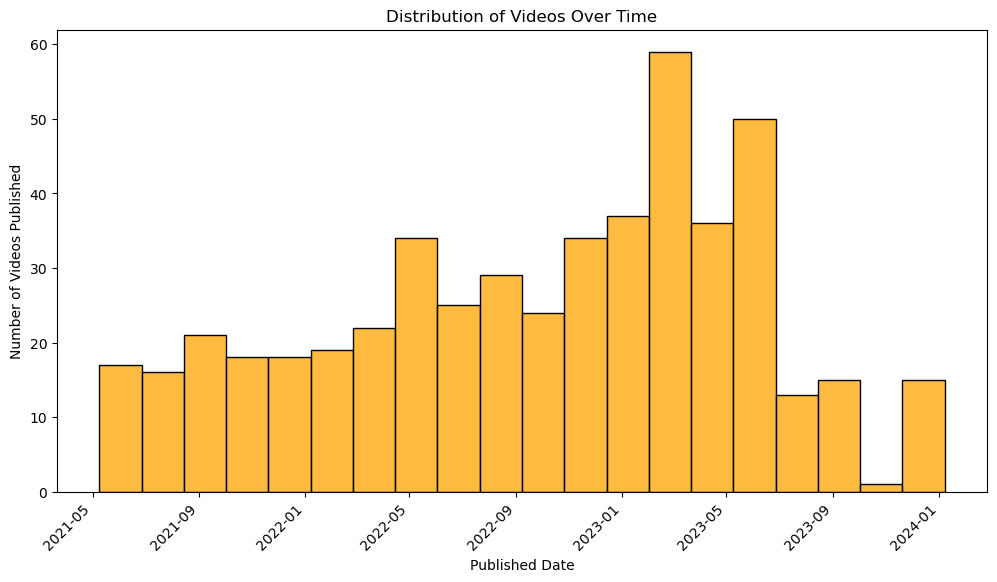

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12, 6))
sns.histplot(df_statistics['Published At'], bins=20, kde=False, color='orange', edgecolor='black')
plt.title('Distribution of Videos Over Time')
plt.xlabel('Published Date')
plt.ylabel('Number of Videos Published')
plt.xticks(rotation=45, ha='right')
plt.show()

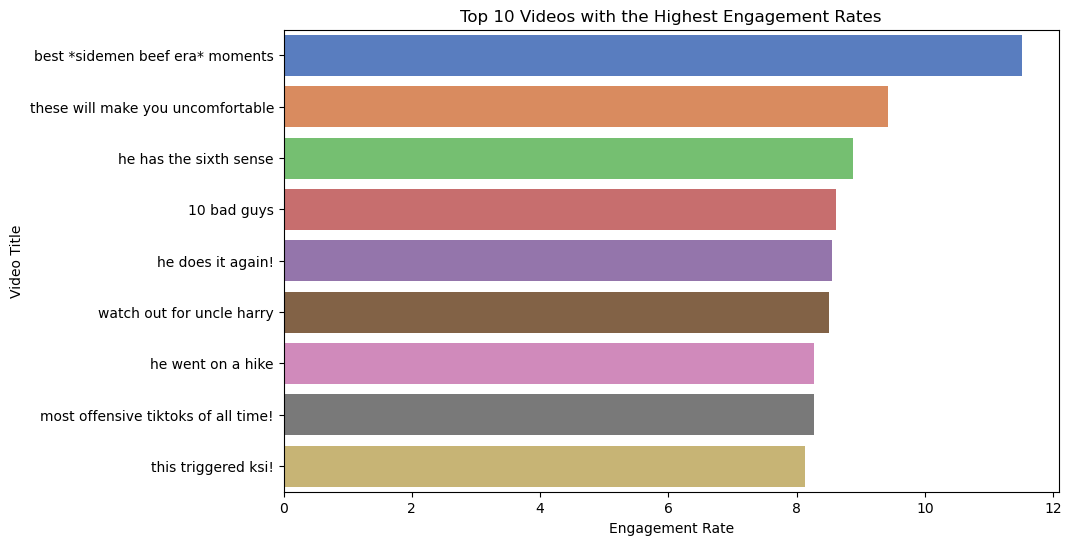

In [43]:
# Get the top 10 videos with the most engagement rates
top_engagement_videos = df_statistics.nlargest(10, 'Engagement Rate')

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Engagement Rate', y='Title', data=top_engagement_videos, palette='muted')
plt.title('Top 10 Videos with the Highest Engagement Rates')
plt.xlabel('Engagement Rate')
plt.ylabel('Video Title')
plt.show()


/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

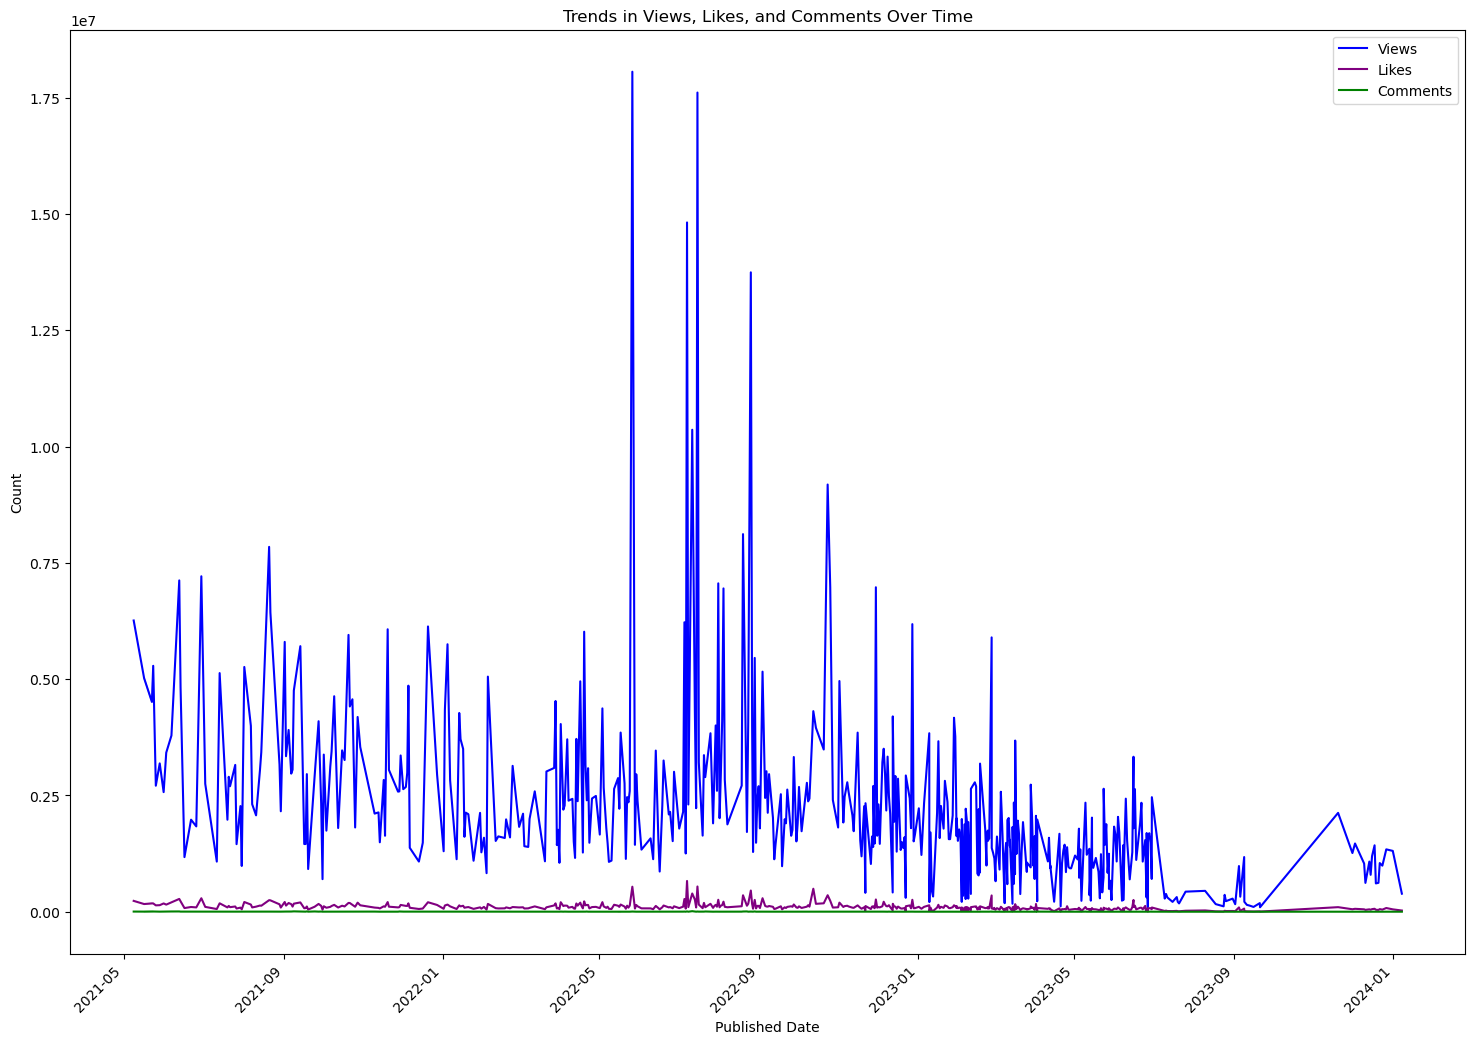

In [44]:
plt.figure(figsize=(18, 12))
sns.lineplot(x='Published At', y='Views', data=df_statistics, label='Views', color='blue')
sns.lineplot(x='Published At', y='Likes', data=df_statistics, label='Likes', color='purple')
sns.lineplot(x='Published At', y='Comments', data=df_statistics, label='Comments', color='green')
plt.title('Trends in Views, Likes, and Comments Over Time')
plt.xlabel('Published Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

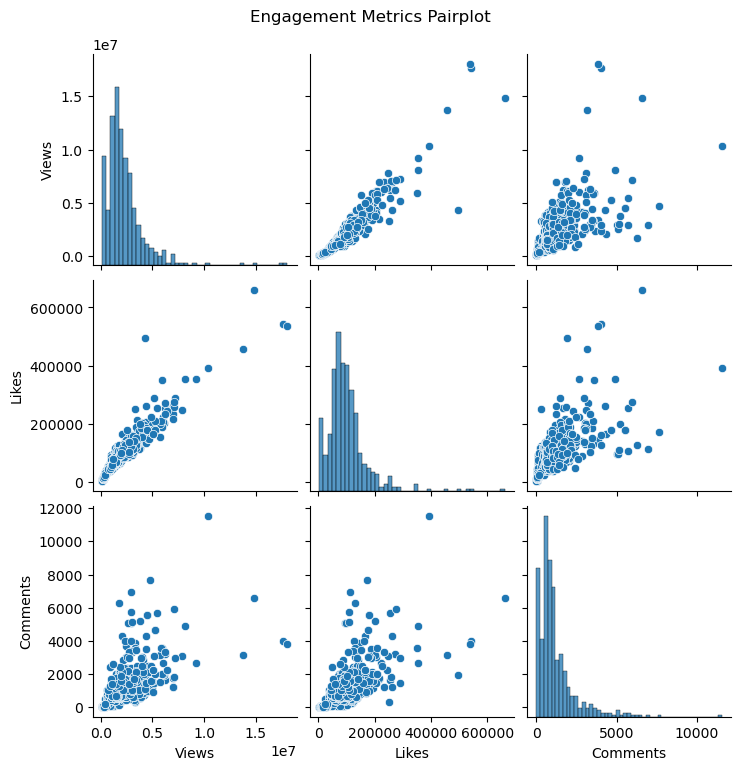

In [45]:
plt.figure(figsize=(14, 8))
sns.pairplot(df_statistics[['Views', 'Likes', 'Comments']])
plt.suptitle('Engagement Metrics Pairplot', y=1.02)
plt.show()

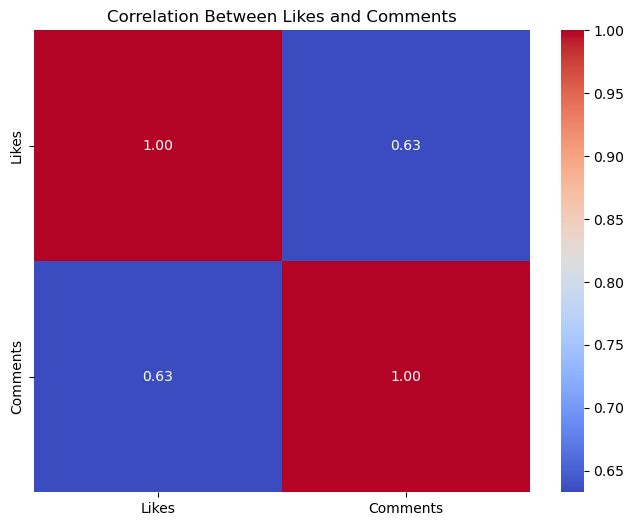

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_statistics[['Likes', 'Comments']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Likes and Comments')
plt.show()

In [47]:
top_videos_views = df_statistics.nlargest(15, 'Views')
top_videos_likes = df_statistics.nlargest(15, 'Likes')
top_videos_comments = df_statistics.nlargest(15, 'Comments')

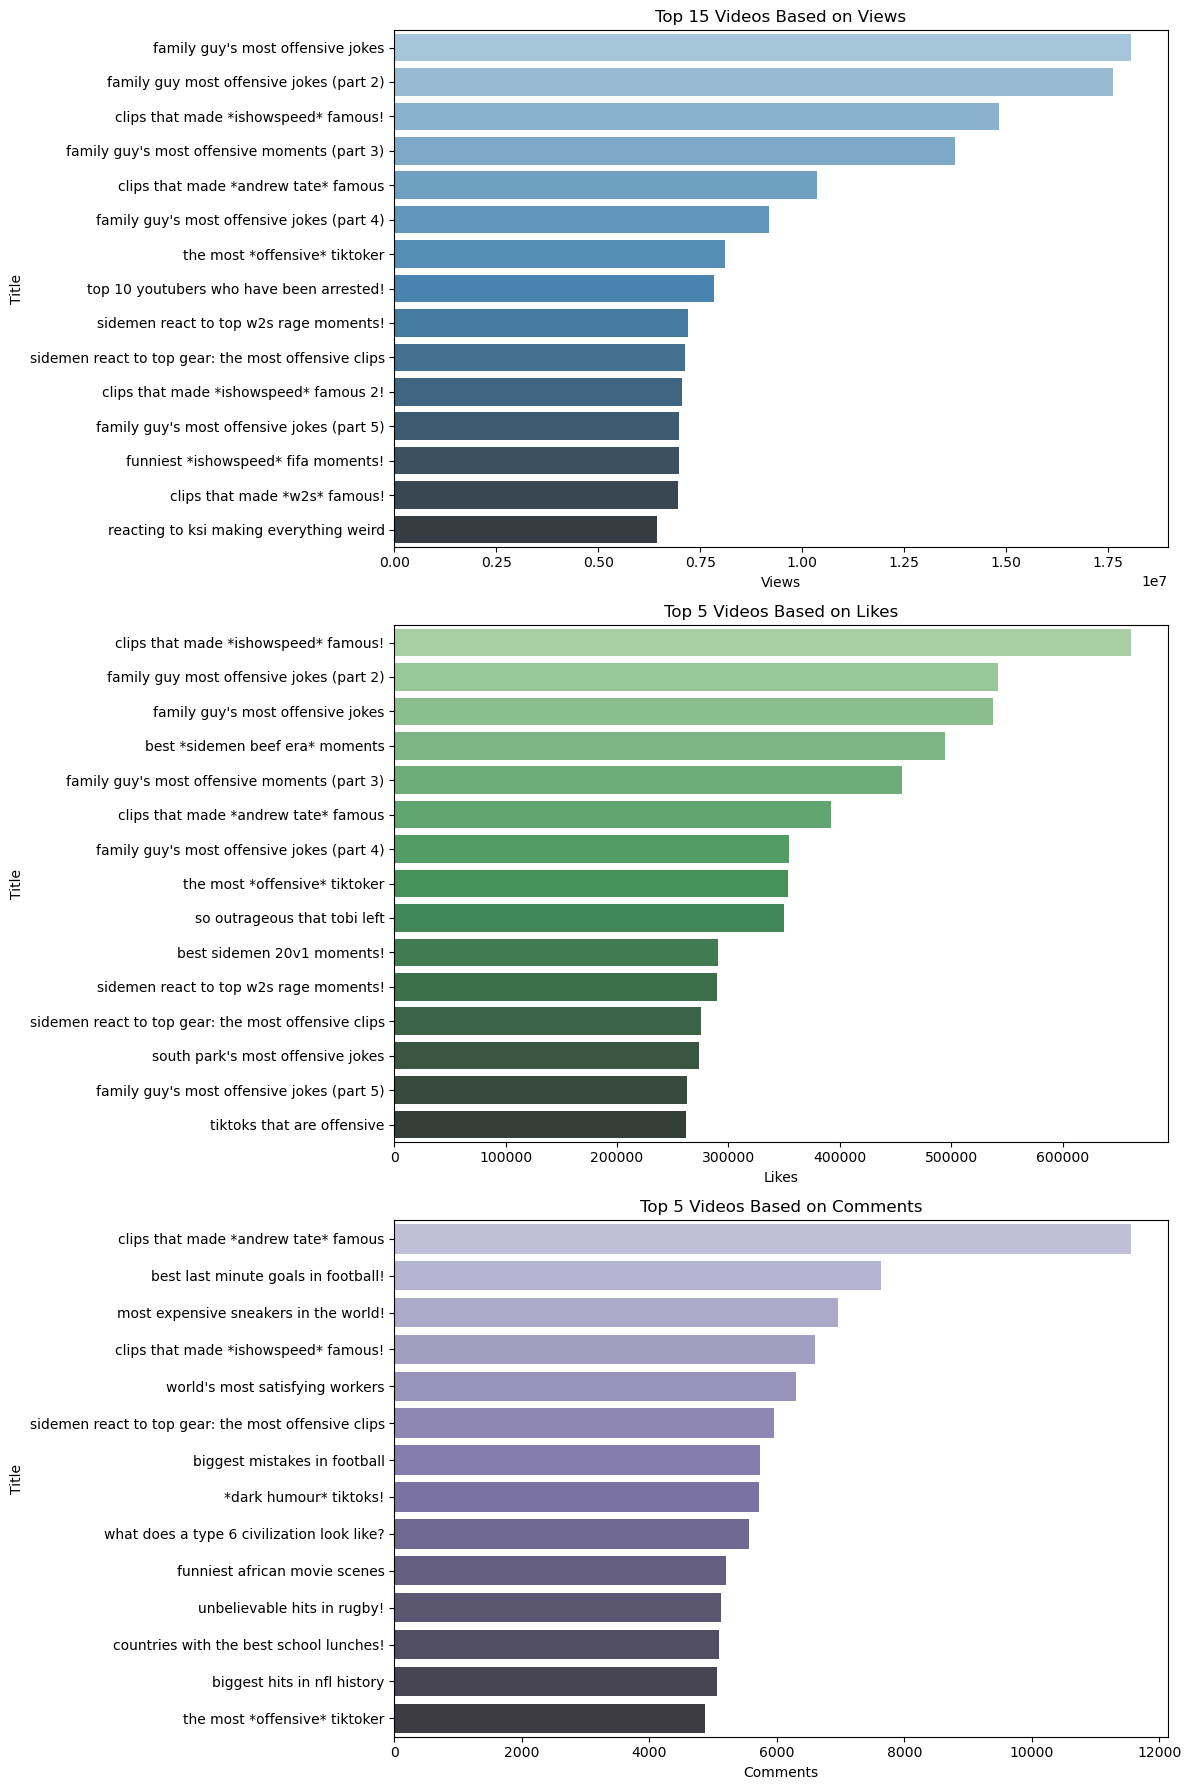

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x='Views', y='Title', data=top_videos_views, palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 15 Videos Based on Views')

sns.barplot(x='Likes', y='Title', data=top_videos_likes, palette='Greens_d', ax=axes[1])
axes[1].set_title('Top 5 Videos Based on Likes')

sns.barplot(x='Comments', y='Title', data=top_videos_comments, palette='Purples_d', ax=axes[2])
axes[2].set_title('Top 5 Videos Based on Comments')

plt.tight_layout()
plt.show()

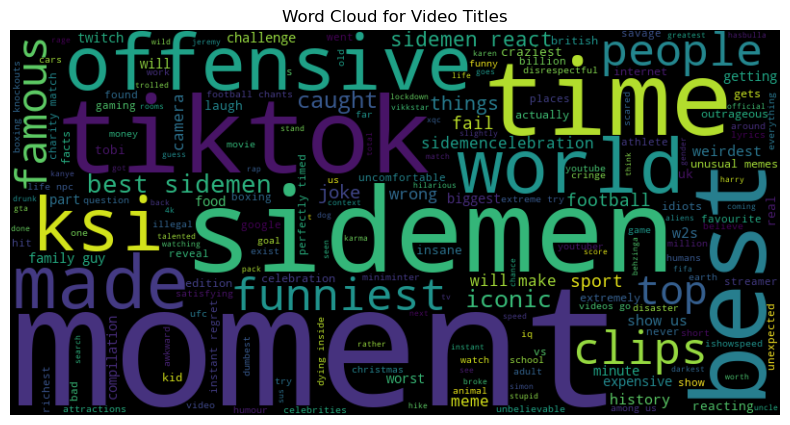

In [49]:
from wordcloud import WordCloud

# Combine all titles into one string
titles_text = ' '.join(df_statistics['Title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Video Titles')
plt.show()

In [50]:
# Text Analysis to identify football-related videos
football_keywords = ['football', 'crossbar', 'penalties', 'freekick', 'team', 'arsenal', 'mancity']

# Create a new column indicating whether the title contains football-related keywords
df_statistics['Football Video'] = df_statistics['Title'].apply(lambda title: any(keyword in title.lower() for keyword in football_keywords))

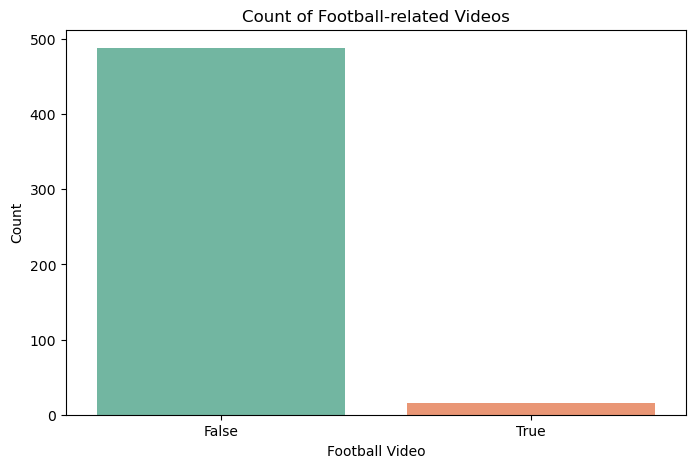

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Football Video', data=df_statistics, palette='Set2')
plt.title('Count of Football-related Videos')
plt.xlabel('Football Video')
plt.ylabel('Count')
plt.show()

Actual Count of Among Us Videos: 3


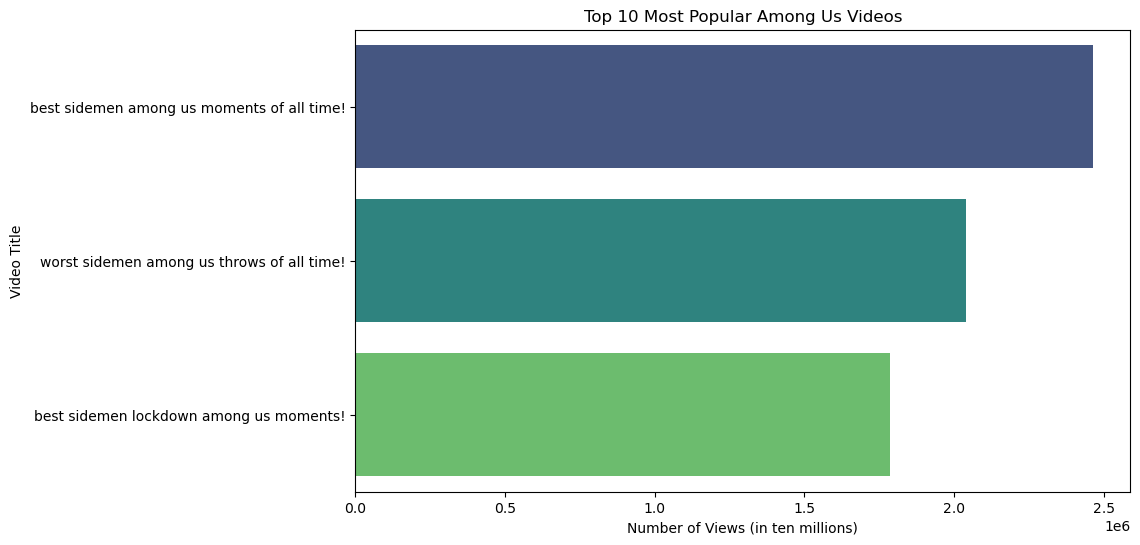

In [52]:
# Text Analysis to identify Among Us-related videos
amongus_keywords = ['among us']

# Create a new column indicating whether the title contains Among Us-related keywords
df_statistics['Among Us'] = df_statistics['Title'].apply(lambda title: any(keyword in title.lower() for keyword in amongus_keywords))

# Display the actual count of Among Us videos
total_among_us_videos = df_statistics['Among Us'].sum()
print("Actual Count of Among Us Videos:", total_among_us_videos)

# Display the top 10 most popular Among Us videos using a bar plot
top_among_us_videos = df_statistics[df_statistics['Among Us']].nlargest(10, 'Views')
plt.figure(figsize=(10, 6))
sns.barplot(x='Views', y='Title', data=top_among_us_videos, palette='viridis')
plt.title('Top 10 Most Popular Among Us Videos')
plt.xlabel('Number of Views (in ten millions)')
plt.ylabel('Video Title')
plt.show()


Actual Count of Videos Related to Specified Keywords:
41


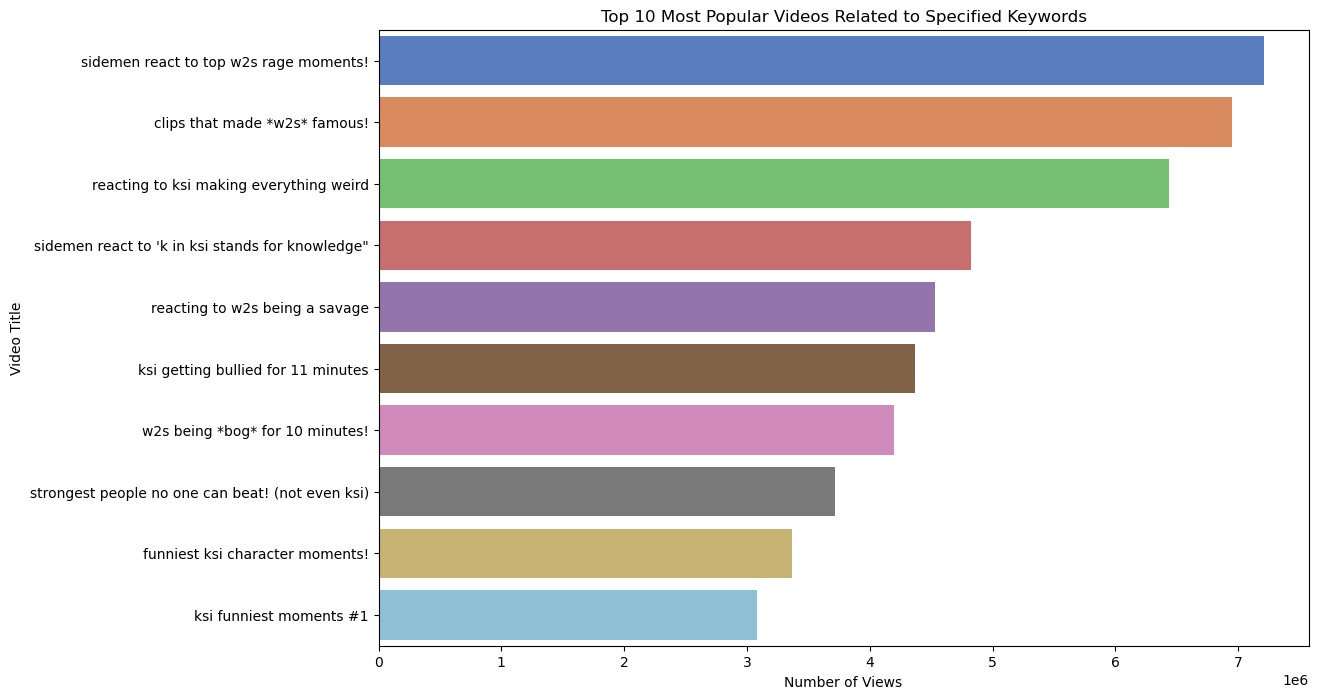

In [56]:
# Text Analysis to identify videos related to specified keywords
side_keywords = ['ksi', 'w2s', 'vik', 'deji', 'chrismd', 'callux', 'fosh', 'chip']

# Create a new column indicating whether the title contains the specified keywords
df_statistics['Related Keywords'] = df_statistics['Title'].apply(lambda title: any(keyword in title.lower() for keyword in side_keywords))

# Display the actual count of videos related to specified keywords
total_side_videos = df_statistics['Related Keywords'].sum()
print("Actual Count of Videos Related to Specified Keywords:")
print(total_side_videos)

# Display the top 10 most popular videos related to specified keywords using a bar plot
top_side_videos = df_statistics[df_statistics['Related Keywords']].nlargest(10, 'Views')
plt.figure(figsize=(12, 8))
sns.barplot(x='Views', y='Title', data=top_side_videos, palette='muted')
plt.title('Top 10 Most Popular Videos Related to Specified Keywords')
plt.xlabel('Number of Views')
plt.ylabel('Video Title')
plt.show()


Top 20 most frequent words in video titles:
moments      106
sidemen       73
best          49
time          31
tiktoks       28
offensive     27
ksi           25
clips         24
world         24
people        24
funniest      23
famous        22
10            21
iconic        17
caught        15
react         14
football      14
things        13
memes         13
jokes         11
dtype: int64


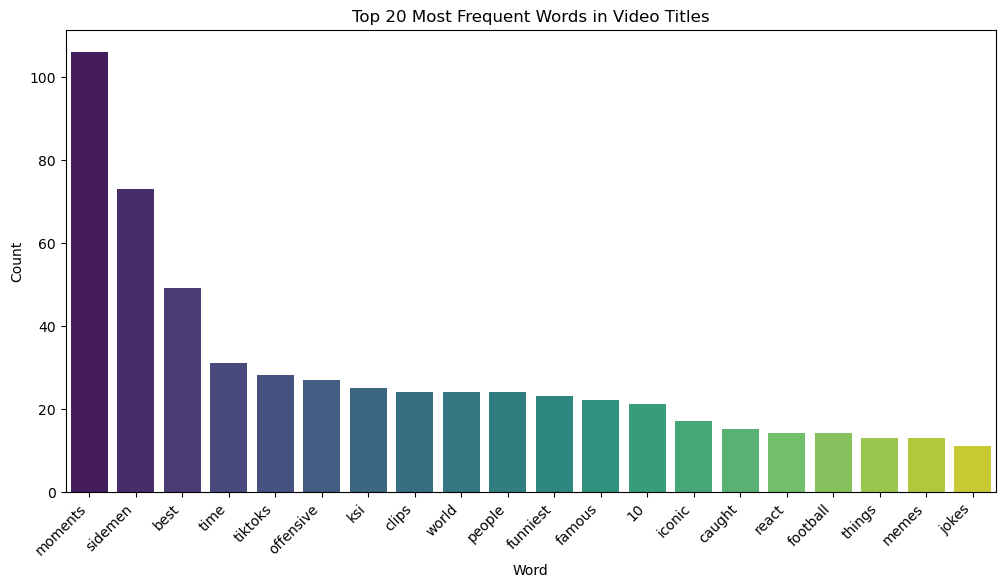

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize words in titles
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
title_words = vectorizer.fit_transform(df_statistics['Title'])

# Get the count of each unique word in titles
word_counts = pd.DataFrame(title_words.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the counts across all titles
total_word_counts = word_counts.sum()

# Display the top 20 most frequent words
top_words = total_word_counts.sort_values(ascending=False).head(20)
print("Top 20 most frequent words in video titles:")
print(top_words)

# Bar plot for the top 20 most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')
plt.title('Top 20 Most Frequent Words in Video Titles')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


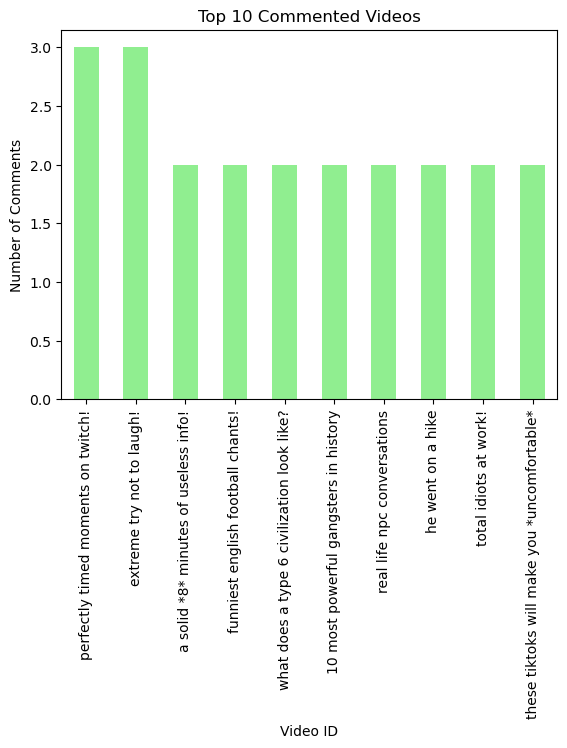

In [58]:
# Top Commented Videos
top_commented_videos = df_statistics['Title'].value_counts().nlargest(10)
top_commented_videos.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Commented Videos')
plt.xlabel('Video ID')
plt.ylabel('Number of Comments')
plt.show()


In [59]:
print(df_comments.isnull().sum())

Video ID      0
Comment       0
Author        2
Like Count    0
dtype: int64


In [60]:
df_comments['Comment'] = df_comments['Comment'].str.lower()

In [61]:
df_comments['Comment'] = df_comments['Comment'].str.replace('[^\w\s]', '')

In [62]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46598 entries, 0 to 46597
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video ID    46598 non-null  object
 1   Comment     46598 non-null  object
 2   Author      46596 non-null  object
 3   Like Count  46598 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [63]:
df_comments.head()

,Video ID,Comment,Author,Like Count
0,7qtrLK0L8NY,"god bless harry man , being the most uncomfort...",@anoushjolly7715,1017
1,7qtrLK0L8NY,harry apologising for it being on his own but ...,@lilyoliver174,1112
2,7qtrLK0L8NY,the best part of harry’s solo reacts is that n...,@MotivatedVirgiI,372
3,7qtrLK0L8NY,can't wait to see these florida memes be adapt...,@anand_kv__,500
4,7qtrLK0L8NY,"don’t worry harry, you being alone during the ...",@Mili_sweet_girl.1995,154


In [64]:
df_comments['Comment'] = df_comments['Comment'].astype(str)

In [65]:
df_comments = pd.merge(df_comments, df_statistics[['Video ID', 'Title']], on='Video ID', how='left')

In [66]:
df_comments.head()

,Video ID,Comment,Author,Like Count,Title
0,7qtrLK0L8NY,"god bless harry man , being the most uncomfort...",@anoushjolly7715,1017,unbelievable florida moments caught on camera!
1,7qtrLK0L8NY,harry apologising for it being on his own but ...,@lilyoliver174,1112,unbelievable florida moments caught on camera!
2,7qtrLK0L8NY,the best part of harry’s solo reacts is that n...,@MotivatedVirgiI,372,unbelievable florida moments caught on camera!
3,7qtrLK0L8NY,can't wait to see these florida memes be adapt...,@anand_kv__,500,unbelievable florida moments caught on camera!
4,7qtrLK0L8NY,"don’t worry harry, you being alone during the ...",@Mili_sweet_girl.1995,154,unbelievable florida moments caught on camera!


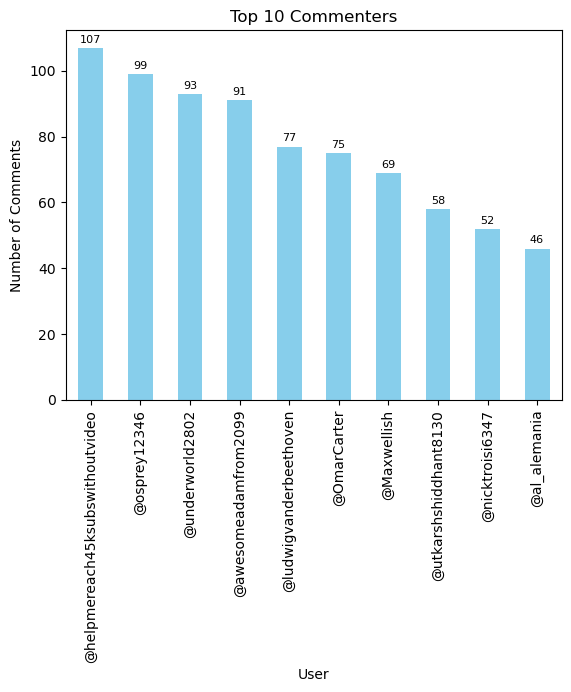

In [67]:
top_commenters = df_comments['Author'].value_counts().nlargest(10)
top_commenters.plot(kind='bar', color='skyblue')
plt.title('Top 10 Commenters')
plt.xlabel('User')
plt.ylabel('Number of Comments')
for i, value in enumerate(top_commenters):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=8)
plt.show()


/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/meetsmacbook/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


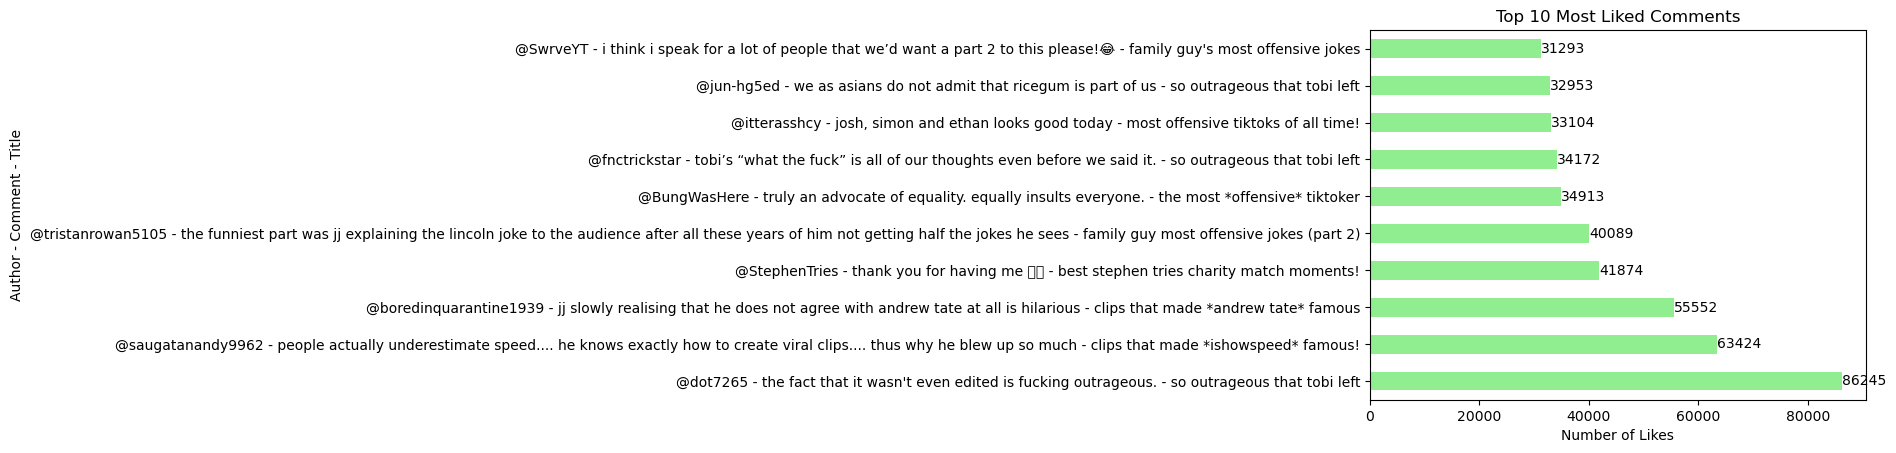

In [75]:
import matplotlib.pyplot as plt

# Set the font to one that supports emojis
plt.rcParams['font.family'] = 'DejaVu Sans'
most_liked_comments = df_comments.nlargest(10, 'Like Count')

# Create a new column combining 'Author', 'Comment', and 'Title' for display
most_liked_comments['Author - Comment - Title'] = most_liked_comments['Author'] + ' - ' + most_liked_comments['Comment'] + ' - ' + most_liked_comments['Title']

# Plot the horizontal bar chart
ax = most_liked_comments.plot(y='Like Count', x='Author - Comment - Title', kind='barh', color='lightgreen', legend=False)
plt.title('Top 10 Most Liked Comments')
plt.xlabel('Number of Likes')
plt.ylabel('Author - Comment - Title')

# Add text annotations
for index, value in enumerate(most_liked_comments['Like Count']):
    ax.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

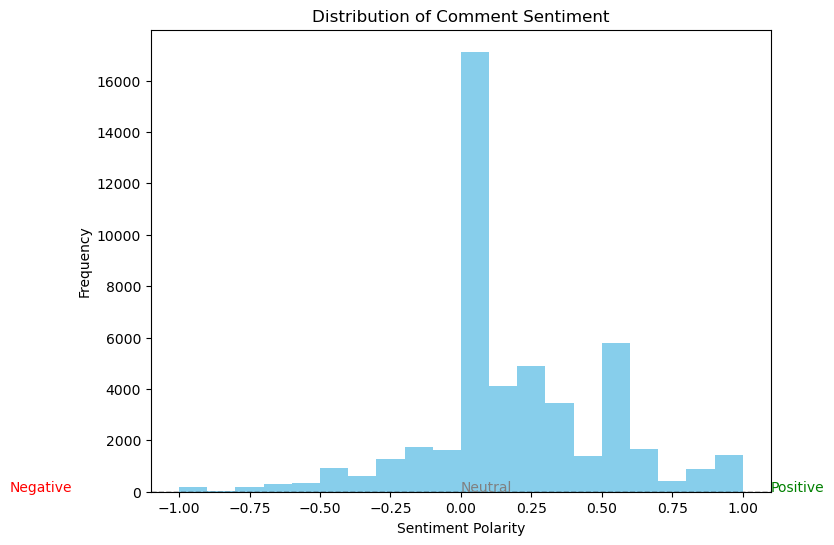

In [76]:
from textblob import TextBlob

# Sentiment Analysis
df_comments['Sentiment'] = df_comments['Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8, 6))
plt.hist(df_comments['Sentiment'], bins=20, color='skyblue')
plt.title('Distribution of Comment Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Information Bar
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.text(1.1, 10, 'Positive', fontsize=10, color='green')
plt.text(-1.6, 10, 'Negative', fontsize=10, color='red')
plt.text(0, 10, 'Neutral', fontsize=10, color='gray')

plt.show()


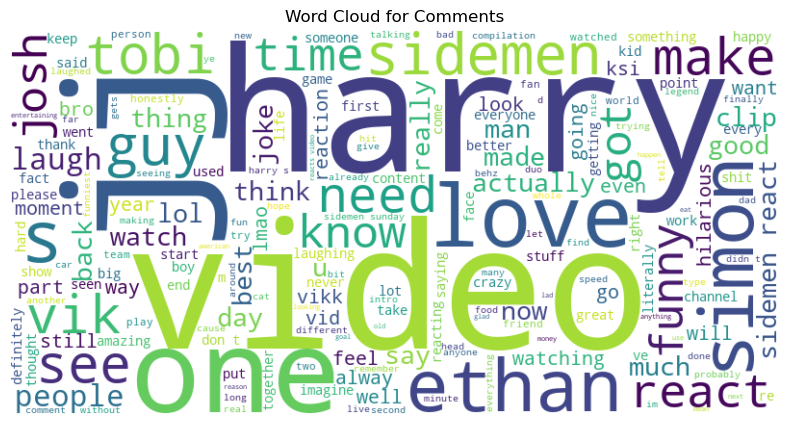

In [77]:
from wordcloud import WordCloud

# Word Cloud for Comments
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_comments['Comment']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()

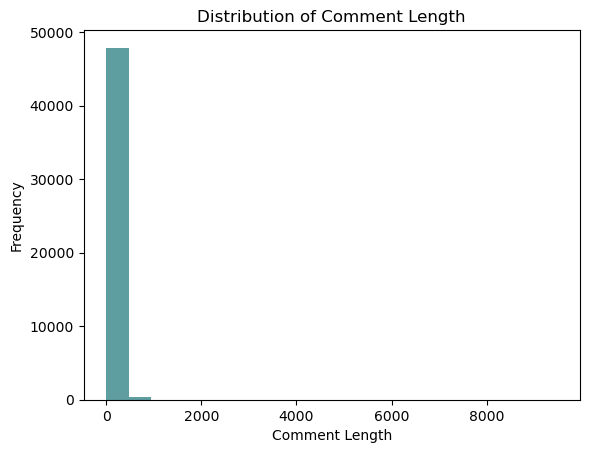

In [78]:
# Comment Length Analysis
df_comments['Comment Length'] = df_comments['Comment'].apply(lambda x: len(str(x)))
df_comments['Comment Length'].plot(kind='hist', bins=20, color='cadetblue')
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


         Like Count     Sentiment  Comment Length
count  48238.000000  48238.000000    48238.000000
mean     214.930138      0.178631       87.291679
std     1250.252394      0.325328      118.513189
min        0.000000     -1.000000        1.000000
25%        0.000000      0.000000       44.000000
50%        2.000000      0.100000       65.000000
75%       13.000000      0.400000       99.000000
max    86245.000000      1.000000     9477.000000


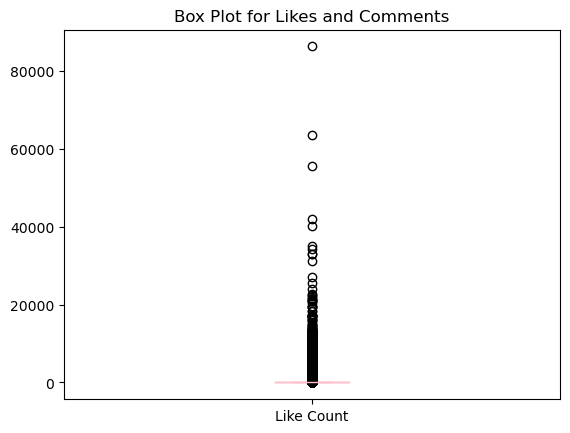

In [79]:
# Statistical Summaries
comment_stats = df_comments.describe()
print(comment_stats)

# Box Plot
df_comments[['Like Count', 'Comment']].plot(kind='box', color='pink')
plt.title('Box Plot for Likes and Comments')
plt.show()
